In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/electricity-production/sales-of-shampoo-over-a-three-ye.csv
/kaggle/input/electricity-production/Electric_Production.csv


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
electricityTimeSeries = pd.read_csv('/kaggle/input/electricity-production/Electric_Production.csv',header=0,index_col=0)

In [5]:
electricityTimeSeries.shape

(397, 1)

In [6]:

electricityTimeSeries.rename(columns = {'IPG2211A2N':'Units'}, inplace = True)

In [7]:
electricityTimeSeries.head()

,Units
DATE,
1/1/1985,72.5052
2/1/1985,70.6720
3/1/1985,62.4502
4/1/1985,57.4714
5/1/1985,55.3151


**Moving Average Method**

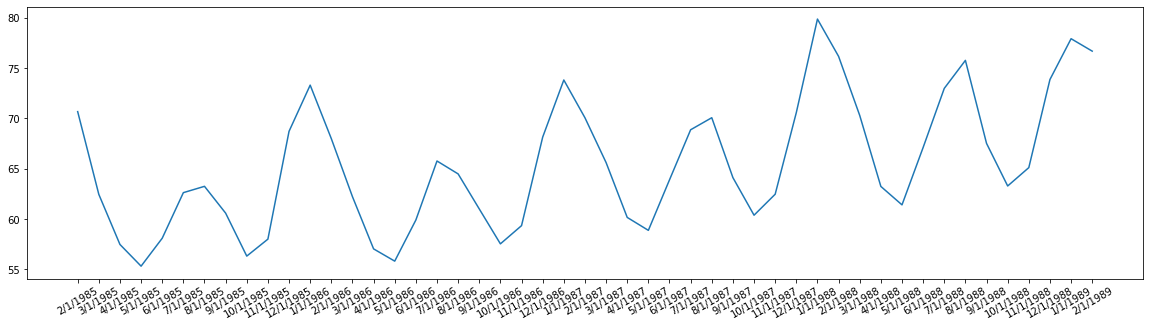

In [8]:
plt.plot(electricityTimeSeries[1:50]['Units'])
plt.xticks(rotation=30)
plt.show()

**Rolling AVerage Transform**

In [9]:
rolling_Series = electricityTimeSeries[1:50].rolling(window=5)
rolling_Mean = rolling_Series.mean()

In [10]:
rolling_Mean.head(10)

,Units
DATE,
2/1/1985,NaN
3/1/1985,NaN
4/1/1985,NaN
5/1/1985,NaN
6/1/1985,60.79982
7/1/1985,59.18946
8/1/1985,59.34912
9/1/1985,59.97176
10/1/1985,60.17182


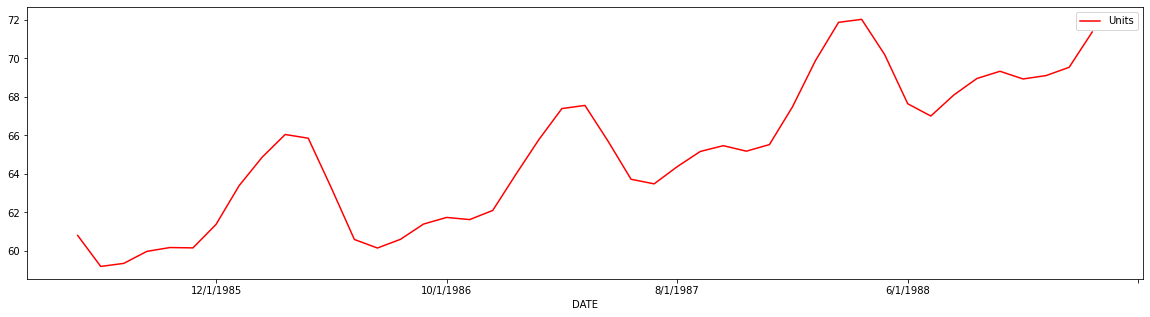

In [11]:
rolling_Mean.plot(color = 'r')
plt.show()

**IF you Observed the curve as started Becoming Smooth**

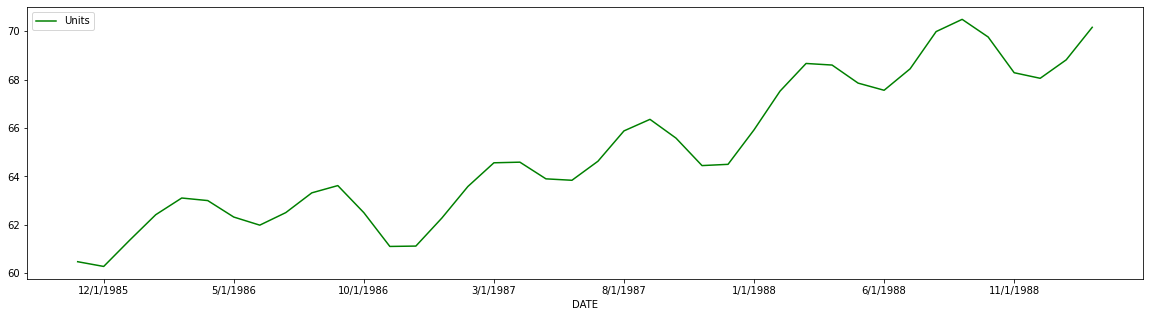

In [12]:
rolling_Series = electricityTimeSeries[1:50].rolling(window=10)
rolling_Mean = rolling_Series.mean()
rolling_Mean.plot(color = 'g')
plt.show()

**Simple Exponential Smoothing**

In [13]:
data = electricityTimeSeries[1:50]
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2,optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8,optimized=False)

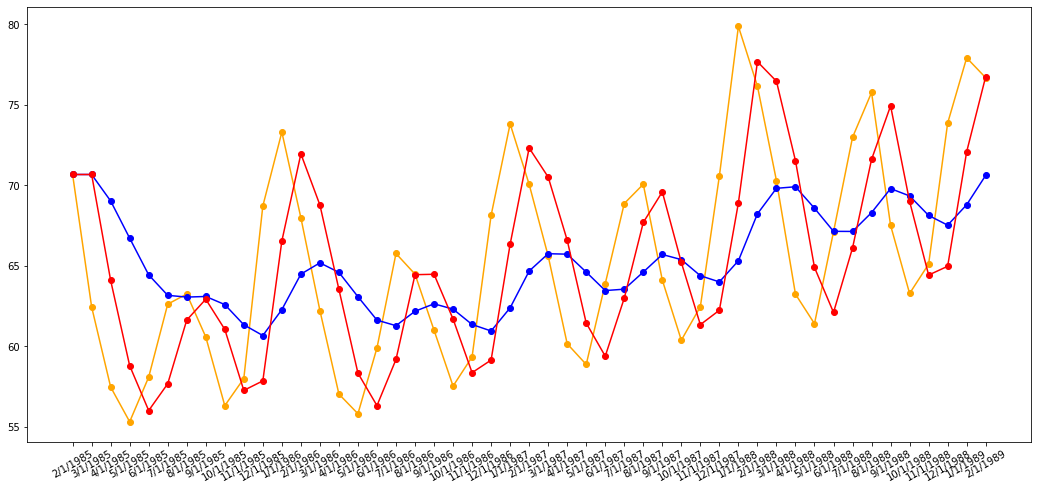

In [14]:
plt.figure(figsize=(18,8))
plt.plot(electricityTimeSeries[1:50],marker = 'o',color =  'orange')
plt.xticks(rotation = 30)
plt.plot(fit1.fittedvalues,marker = 'o',color =  'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color =  'red')


**Holt Method for Exponential Smoothing**

In [15]:
fit1 = Holt(data).fit()
fit2 = Holt(data,exponential=True).fit()

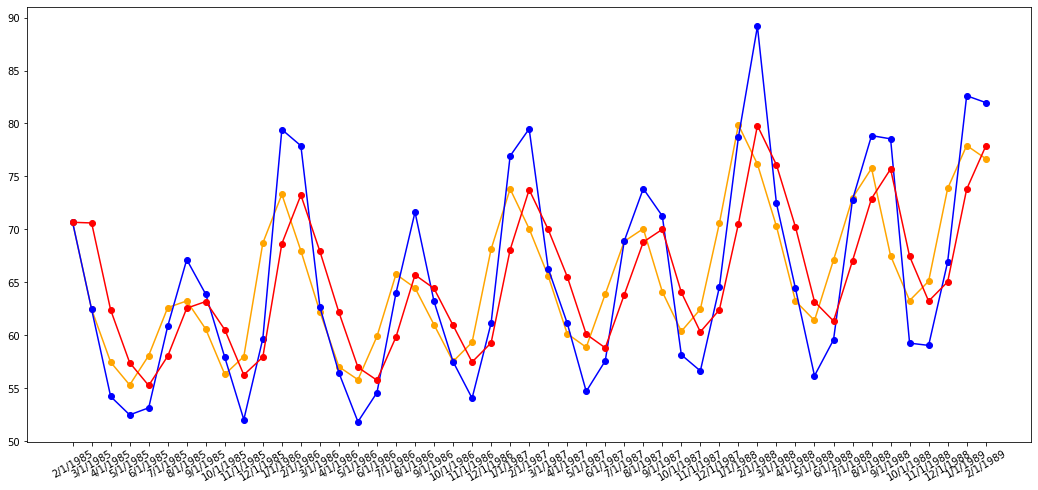

In [16]:
plt.figure(figsize=(18,8))
plt.plot(data,marker = 'o',color =  'orange')
plt.xticks(rotation = 30)
plt.plot(fit1.fittedvalues,marker = 'o',color =  'blue')
plt.plot(fit2.fittedvalues,marker = 'o',color =  'red')
